## STAT 841 Assignment 1  Q2
Name   : Ruifan Yu  
Stu ID : 20664766  
Email  : ruifan.yu@uwaterloo.ca  

---
### (a) 
### The Logistic Regression of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Oscar2012.csv')

In [3]:
df.head()

,year,title,winner,oscar_nominations,Golden_Globes,comedy
0,1984,A Soldier's Story,0,3,0,0
1,1984,Places in the Heart,0,7,1,0
2,1984,The Killing Fields,0,7,1,0
3,1984,A Passage to India,0,11,3,0
4,1984,Amadeus,1,11,4,0


In [4]:
df.shape

(132, 6)

In [5]:
X = df.ix[:,'oscar_nominations': 'comedy']

In [6]:
Y = df['winner']

In [7]:
res = sm.formula.glm("winner ~ oscar_nominations + Golden_Globes + comedy",
                     family=sm.families.Binomial(), 
                     data=df).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 winner   No. Observations:                  132
Model:                            GLM   Df Residuals:                      128
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -40.418
Date:                Wed, 21 Sep 2016   Deviance:                       80.835
Time:                        19:19:06   Pearson chi2:                     133.
No. Iterations:                     8                                         
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -6.6843      1.200     -5.572      0.000        -9.036    -4.333
oscar_nominations     0.5273   

### From the output, the coefficient of `Oscar_nominations` is 0.5273 and means that we would expect a 0.5273 unit increase in the log odds and $e^{0.5273}=1.69435$ unit increase in the odds of `winner` with every one-unit increase in `Oscar_nominations`, with all other variables held constant.  
### the `p-value` of `Oscar_nominations` is small enough, that means this coefficient is statistically significant.
---

### (b) 
### Predict Winner based on the model

In [8]:
prob_res = res.predict()
change = np.vectorize(lambda x: 1 if x >= 0.5 else 0)
binary_res = change(prob_res)

In [9]:
print('The prediction of these 132 samples is ')
print(binary_res)

The prediction of these 132 samples is 
[0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [10]:
print('The number of right prediction is', sum(binary_res == Y))
print('The number of wrong prediction is', sum(binary_res != Y))
print('The correctness percentage is {0:.3f}%'.format(sum(binary_res == Y) / len(Y) * 100))

The number of right prediction is 115
The number of wrong prediction is 17
The correctness percentage is 87.121%


### The following table shows the wrong predictions

In [11]:
df[Y != binary_res]

,year,title,winner,oscar_nominations,Golden_Globes,comedy
3,1984,A Passage to India,0,11,3,0
14,1986,Platoon,1,8,3,0
24,1988,Rain Man,1,8,2,0
28,1989,Driving Miss Daisy,1,9,3,0
35,1991,The Silence of the Lambs,1,7,1,0
44,1992,Unforgiven,1,9,2,0
59,1995,Braveheart,1,10,1,0
73,1998,Saving Private Ryan,0,11,2,0
79,1999,American Beauty,1,8,3,0
87,2001,The Lord of the Rings: The Fellowship of the Ring,0,13,0,0


### the (2, 2) confusion matrix is

In [12]:
confusion_matrix(Y, binary_res)

array([[101,   6],
       [ 11,  14]])

### Confusion Matrix
|    |Predicted No|Predicted Yes|Sum|
|:---:|:----------:|:----------:|:--:|
|Actual No|101|6|107|
|Actual Yes|11|14|25|
|Sum|112|20|132|

### according to the matrix, the percentage of misclassified movies is 
$$P=\frac{11+6}{132}=0.12879=12.879\%$$
---

### (c)
### For the movie “The theory of everything”, the input is (5, 5, 0), the coefficients are 

In [13]:
res.params

Intercept           -6.684267
oscar_nominations    0.527261
Golden_Globes        0.491414
comedy              -1.293635
dtype: float64

In [14]:
b_0 = res.params[0]
b_1 = res.params[1]
b_2 = res.params[2]
b_3 = res.params[3]

### The probability is  

In [15]:
1 / (1 + math.exp(-(b_0 + b_1 * 5 + b_2 * 5 + b_3 * 0)))

0.16925816304294056

---
### (d)
### (i)
### increase the number of variables by adding the interactions and squared term
### That means adding `oscar_nominations:Golden_Globes`, `oscar_nominations:comedy`, `Golden_Globes:comedy`, `oscar_nominations^2`, `Golden_Globes^2` into model
### Notice that `comedy` is either 0 or 1, so `comedy^2` is exactly same to `comedy`. Therefore, `comedy^2` will be ignored. 

In [16]:
res_full = sm.formula.glm("winner ~ oscar_nominations + Golden_Globes + comedy +\
                        oscar_nominations:Golden_Globes + oscar_nominations:comedy + Golden_Globes:comedy +\
                        oscar_nominations^2 + Golden_Globes^2",
                     family=sm.families.Binomial(),
                     data=df).fit()
print(res_full.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 winner   No. Observations:                  132
Model:                            GLM   Df Residuals:                      123
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -35.126
Date:                Tue, 20 Sep 2016   Deviance:                       70.253
Time:                        23:28:12   Pearson chi2:                     122.
No. Iterations:                    25                                         
                                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                          -2.9357      1.725     -1.702      0.089        -6.317

### By `Backward Selection`, the variable with largest `p-value` will be removed, the remaining variables are used to another new fit. Repeat this process until all `p-value`s of variable are smaller than significant level $\alpha$. In this case, $\alpha=10\%$, I am doing backward selection by hand and repeat the regression. During selection, `comedy`, `oscar_nominations:comedy`, `Golden_Globes:comedy`, , `oscar_nominations`, `Golden_Globes^2` will be removed  
### the remaining variables are `Golden_Globes`, `oscar_nominations:Golden_Globes`, `oscar_nominations^2`  
### All the `p-value`s are smaller than 0.1

In [17]:
res_select = sm.formula.glm("winner ~ Golden_Globes +\
                        oscar_nominations:Golden_Globes +\
                        oscar_nominations^2",
                     family=sm.families.Binomial(),
                     data=df).fit()
print(res_select.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 winner   No. Observations:                  132
Model:                            GLM   Df Residuals:                      128
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -36.919
Date:                Tue, 20 Sep 2016   Deviance:                       73.838
Time:                        23:28:39   Pearson chi2:                     129.
No. Iterations:                     8                                         
                                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                          -4.3693      1.104     -3.956      0.000        -6.534

### (ii)
### Use this new model to fit the data

In [18]:
prob_res_select = res_select.predict()
binary_res_select = change(prob_res_select)

In [19]:
print('The prediction of these 132 samples is ')
print(binary_res_select)

The prediction of these 132 samples is 
[0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [20]:
print('The number of right prediction is', sum(binary_res_select == Y))
print('The number of wrong prediction is', sum(binary_res_select != Y))
print('The correctness percentage is {0:.3f}%'.format(sum(binary_res_select == Y) / len(Y) * 100))

The number of right prediction is 117
The number of wrong prediction is 15
The correctness percentage is 88.636%


### The confusion matrix of the new model is

In [21]:
confusion_matrix(Y, binary_res_select)

array([[103,   4],
       [ 11,  14]])

### Confusion Matrix
|    |Predicted No|Predicted Yes|Sum|
|:---:|:----------:|:----------:|:--:|
|Actual No|103|4|107|
|Actual Yes|11|14|25|
|Sum|114|18|132|

### Comparing with model in (a), this model predicts the data slightly better.

### (iii)
### Plot the scatter graph for the results of two regressions

In [22]:
x = prob_res
y = prob_res_select
color = binary_res != binary_res_select

In [23]:
%matplotlib inline

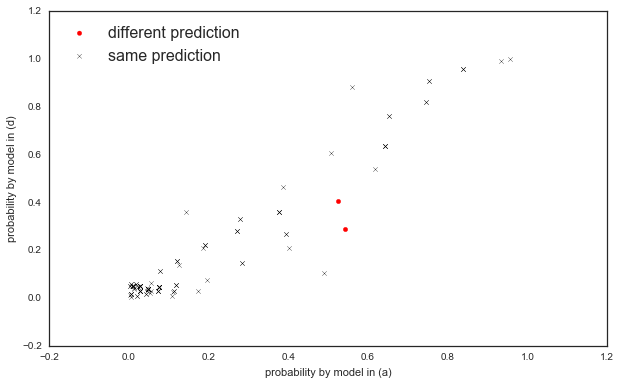

In [24]:
sns.set_style("white")
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
diff = plt.scatter(x[binary_res != binary_res_select], y[binary_res != binary_res_select], marker='o', color='r')
same = plt.scatter(x[binary_res == binary_res_select], y[binary_res == binary_res_select], marker='x', color='black')
plt.legend((diff, same), ('different prediction', 'same prediction'), scatterpoints=1, loc='upper left', fontsize=16)
ax.set_xlabel('probability by model in (a)')
ax.set_ylabel('probability by model in (d)')

### The graph shows the two points that have changed in the confusion matrix
### Find out these two observations

In [25]:
df[binary_res != binary_res_select]

,year,title,winner,oscar_nominations,Golden_Globes,comedy
73,1998,Saving Private Ryan,0,11,2,0
87,2001,The Lord of the Rings: The Fellowship of the Ring,0,13,0,0


In [29]:
print('the predictions by model(a) is', binary_res[binary_res != binary_res_select])
print('the predictions by model(d) is', binary_res_select[binary_res != binary_res_select])

the predictions by model(a) is [1 1]
the predictions by model(d) is [0 0]


### It turns out the results by model (d) are correct.

---
### (g)
### (1) As collected from the internet, the data of these movies are as following

In [34]:
df_2 = pd.read_csv('Oscar2016.csv')

In [35]:
df_2

,title,winner,oscar_nominations,Golden_Globes,comedy
0,The Big Short,0,5,4,1
1,Bridge of Spies,0,6,1,0
2,Brooklyn,0,3,1,0
3,Mad Max: Fury Road,0,10,2,0
4,The Martian,0,7,3,0
5,The Revenant,0,12,4,0
6,Room,0,4,3,0
7,Spotlight,1,6,3,0


### (2)

In [36]:
test_x = df_2.ix[:,'oscar_nominations': 'comedy']

In [37]:
df_2['probability'] = res.predict(test_x)

In [40]:
df_2.sort_values('probability', ascending=False)

,title,winner,oscar_nominations,Golden_Globes,comedy,probability
5,The Revenant,0,12,4,0,0.833206
3,Mad Max: Fury Road,0,10,2,0,0.394406
4,The Martian,0,7,3,0,0.179579
7,Spotlight,1,6,3,0,0.114411
1,Bridge of Spies,0,6,1,0,0.046120
6,Room,0,4,3,0,0.043067
0,The Big Short,0,5,4,1,0.033056
2,Brooklyn,0,3,1,0,0.009843


### Sort the data by `Probability`

In [41]:
df_2.sort_values(by='probability', ascending=False)

,title,winner,oscar_nominations,Golden_Globes,comedy,probability
5,The Revenant,0,12,4,0,0.833206
3,Mad Max: Fury Road,0,10,2,0,0.394406
4,The Martian,0,7,3,0,0.179579
7,Spotlight,1,6,3,0,0.114411
1,Bridge of Spies,0,6,1,0,0.046120
6,Room,0,4,3,0,0.043067
0,The Big Short,0,5,4,1,0.033056
2,Brooklyn,0,3,1,0,0.009843


### According to the predict results, "Spotlight" is unexpected winner.
### The movie with highest probability to win is "The Revenant"